In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("report.csv")

In [3]:
df.head()

,experiment_name,experiment_iteration,task_number,code_fix_count,code_syntax_status,obj_expected,obj_given,obj_status,sum_prompt_tokens,sum_completion_tokens,sum_prompt_tokens_price,sum_completion_tokens_price,sum_price
0,experiment_11,1,1,0,True,78.64,78.637602,True,672,340,0.000101,0.000204,0.000305
1,experiment_11,1,2,0,True,15.00,15.000000,True,420,197,0.000063,0.000118,0.000181
2,experiment_11,1,3,0,True,12000.00,12000.000000,True,650,295,0.000097,0.000177,0.000275
3,experiment_11,1,4,0,True,7.37,7.370370,True,631,401,0.000095,0.000241,0.000335
4,experiment_11,1,5,0,True,240.90,240.900000,True,964,533,0.000145,0.000320,0.000464


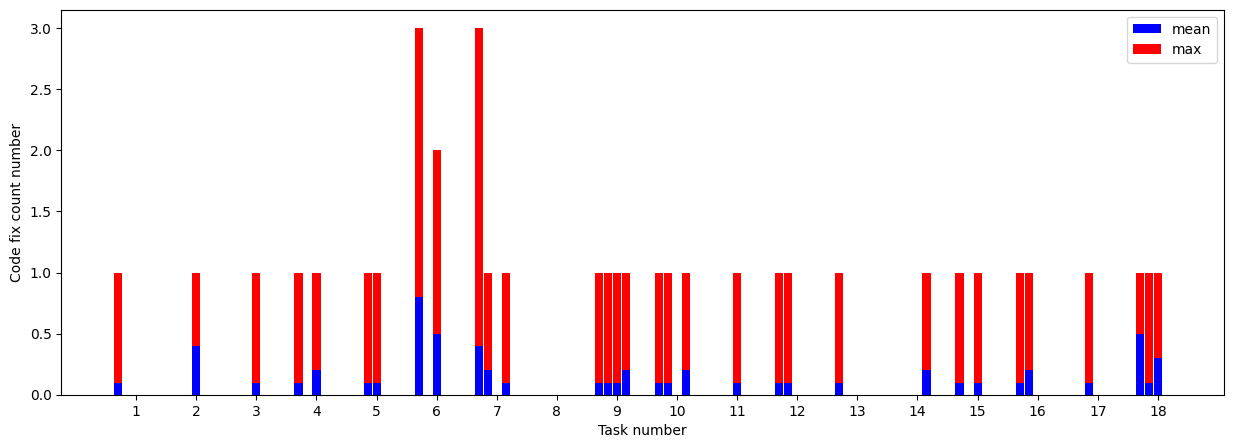

In [12]:
tasks = df["task_number"].unique()

width = 0.15
fig, ax = plt.subplots(figsize=(15, 5))
bottom = np.zeros(18)

for i, experiment in enumerate(df.experiment_name.unique()):
    mean_code_fix_count = df.groupby(["experiment_name", "task_number"])["code_fix_count"].mean().unstack()
    mean_code_fix_count = mean_code_fix_count.loc[experiment]
    max_code_fix_count = df.groupby(["experiment_name", "task_number"])["code_fix_count"].max().unstack()
    max_code_fix_count = max_code_fix_count.loc[experiment]

    ax.bar(tasks + i * width, mean_code_fix_count.values, width - 0.015, label="mean", bottom=np.zeros(18),
           color="blue")
    ax.bar(tasks + i * width, max_code_fix_count.values - mean_code_fix_count.values, width - 0.015, label="max",
           bottom=mean_code_fix_count.values, color="red")
    
    

ax.legend(['mean', 'max'])
ax.set_xticks(tasks + width + 0.15, tasks)
ax.set_xlabel("Task number")
ax.set_ylabel("Code fix count number")
# add values for max code fix count
plt.show()

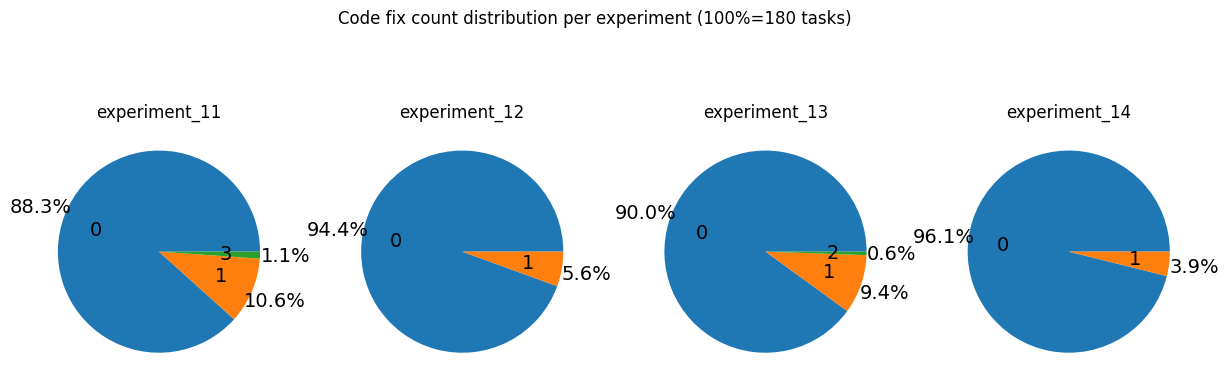

In [13]:
tasks = df["task_number"].unique()

width = 0.3
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

for i, experiment in enumerate(df.experiment_name.unique()):
    code_fix_count_per_experiment = df[df.experiment_name == experiment]
    # count values of code_fix_count
    code_fix_count_per_experiment.value_counts("code_fix_count")
    ax[i].pie(code_fix_count_per_experiment.value_counts("code_fix_count").values,
              labels=code_fix_count_per_experiment.value_counts("code_fix_count").index,
              autopct='%1.1f%%',
              pctdistance=1.25,
              labeldistance=.6,
              )
    # increase size of text in pie chart
    [t.set_fontsize(14) for t in ax[i].texts]
    # add labels
    ax[i].set_title(experiment)
    
# title of the whole figure
fig.suptitle("Code fix count distribution per experiment (100%=180 tasks)")

plt.show()


In [264]:

experiment_11_efficiency = df.groupby(["experiment_name","experiment_iteration"])["obj_status"].mean() * 100 #.sum() / 18 * 100
experiment_11_efficiency_std = experiment_11_efficiency.groupby("experiment_name").std()   
experiment_11_efficiency = experiment_11_efficiency.groupby("experiment_name").mean()

experiment_11_cost = df.groupby(["experiment_name","experiment_iteration"])["sum_price"].mean()
experiment_11_cost_std = experiment_11_cost.groupby("experiment_name").std()   
experiment_11_cost = experiment_11_cost.groupby("experiment_name").mean()

experiment_11 = pd.merge(experiment_11_efficiency, experiment_11_cost, on="experiment_name")

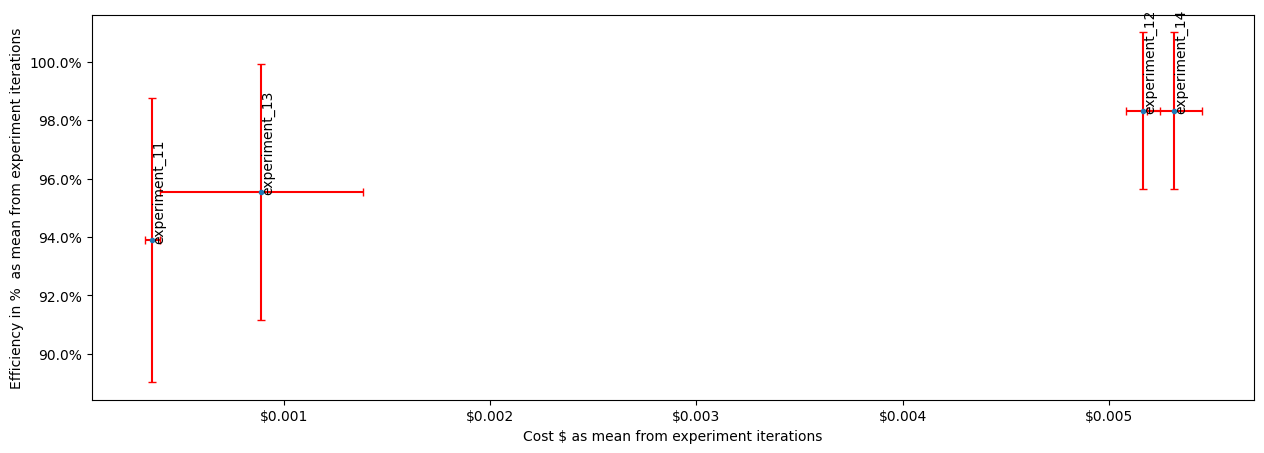

In [270]:

fig, ax = plt.subplots(figsize=(15, 5))
# ax.scatter(experiment_11["sum_price"], experiment_11["obj_status"])
ax.set_xlabel("Cost $ as mean from experiment iterations")
ax.set_ylabel("Efficiency in %  as mean from experiment iterations")
for i, txt in enumerate(experiment_11.index):
    ax.annotate(txt, (experiment_11["sum_price"][i], experiment_11["obj_status"][i]), rotation=90)
    # rotate text
# add to x label $ sign to the number
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(float(x))))
# add to y label % sign to the number
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(round(x, 1))))

ax.errorbar(experiment_11["sum_price"], experiment_11["obj_status"], xerr=experiment_11_cost_std.values, yerr=experiment_11_efficiency_std.values, fmt='.', capsize=3, ecolor='red')


plt.show()
